# Distúrbio de gravidade e anomalia bouguer

Notebook que demonstrará como calcular o distúrbio de gravidade e a anomalia bouguer para o mundo inteiro.

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import boule as bl
import harmonica as hm

In [2]:
notebook_name = '1. disturbance_bouguer_anomaly.ipynb'

## Carregando os dados do EIGEN-6C4

Dados baixados do modelo EIGEN-6C4 no [*International Center for Global Earth Models* (ICGEM)](http://icgem.gfz-potsdam.de/home).

In [3]:
fname = '../../data_set/gravity/gravity_05deg_EIGEN-6C4.gdf'

In [4]:
data = hm.load_icgem_gdf(fname)

In [5]:
fname = '../../data_set/gravity/geoid_05degree_EIGEN-6C4.gdf'

In [6]:
geoide = hm.load_icgem_gdf(fname)

In [7]:
data['geoid'] = geoide.geoid

In [8]:
fname = '../../data_set/gravity/topography_05degree_etopo1.gdf'

In [9]:
topografia = hm.load_icgem_gdf(fname) 

In [10]:
data['topography'] = topografia.topography_shm

In [11]:
data

<xarray.Dataset>
Dimensions:        (latitude: 361, longitude: 721)
Coordinates:
  * longitude      (longitude) float64 -180.0 -179.5 -179.0 ... 179.5 180.0
  * latitude       (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
Data variables:
    h_over_geoid   (latitude, longitude) float64 2.745e+03 2.745e+03 ... 0.0 0.0
    gravity_earth  (latitude, longitude) float64 9.824e+05 ... 9.832e+05
    geoid          (latitude, longitude) float64 -29.41 -29.41 ... 15.47 15.47
    topography     (latitude, longitude) float64 2.745e+03 ... -4.24e+03
Attributes: (12/32)
    generating_institute:  gfz-potsdam
    generating_date:       2021/04/09
    product_type:          gravity_field
    body:                  earth
    modelname:             EIGEN-6C4
    max_used_degree:       2190
    ...                    ...
    maxvalue:              9.8331105E+05 mgal
    minvalue:              9.7683272E+05 mgal
    signal_wrms:           1.5242532E+03 mgal
    grid_format:           long_lat_height_value
    attributes:            longitude latitude h_over_geoid gravity_earth
    attributes_units:      deg. deg. meter mgal

### Inserindo os dados em um DataFrame

In [12]:
latitude = data.latitude
longitude = data.longitude
elevation = data.h_over_geoid
geoid = data.geoid
gravity = data.gravity_earth
topography = data.topography

### Campo de gravidade para o mundo inteiro

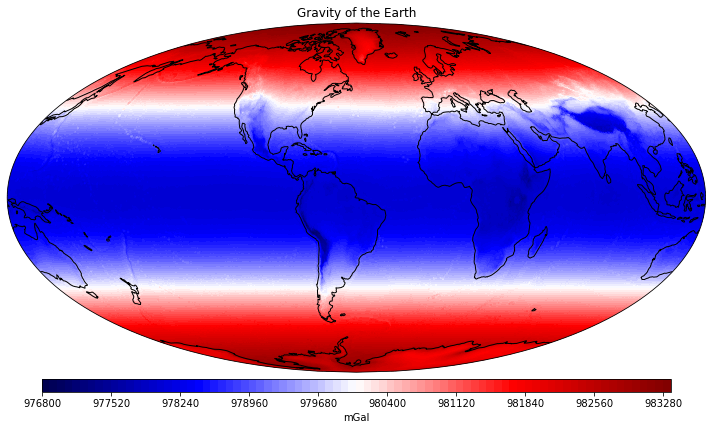

In [13]:
title_font = 20
bottom_font = 18
plt.figure(figsize=(10,10), tight_layout=True)

projection=ccrs.Mollweide(central_longitude=-50)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title("Gravity of the Earth")
pg = ax.contourf(longitude,
                 latitude,
                 gravity,100,transform=ccrs.PlateCarree(),cmap='seismic')
cb = plt.colorbar(pg,label="mGal", orientation="horizontal", pad=.01, aspect=50, shrink=0.9)

file_name = 'images/gravity_earth'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

### Gravidade Normal

#### Parâmetros do elipsoide WGS84

In [14]:
elipsoide = bl.WGS84

#### Formula proposta por Li and Gotze (2001)

In [15]:
gamma = elipsoide.normal_gravity(latitude,elevation)

## Gravidade Normal

/home/andrelreis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


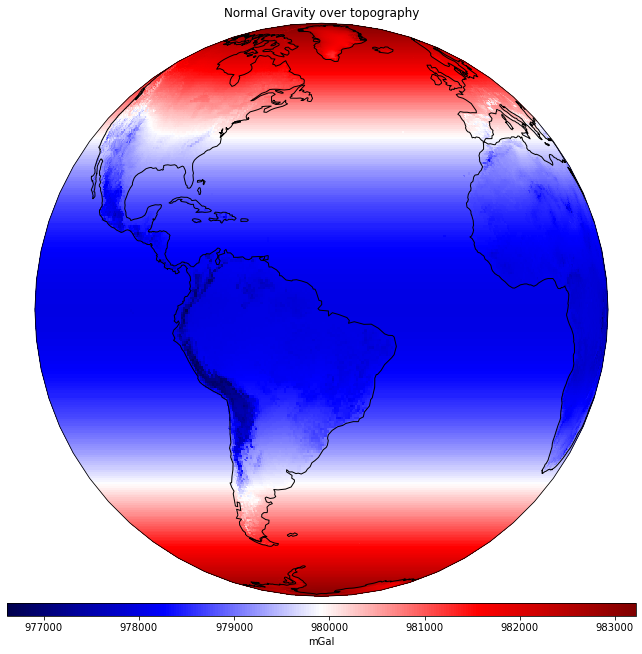

In [16]:
title_font = 20
bottom_font = 18
plt.figure(figsize=(10,10), tight_layout=True)

projection=ccrs.Orthographic(central_longitude=-50)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title("Normal Gravity over topography")
pg = ax.pcolormesh(longitude,
                   latitude,
                   gamma,transform=ccrs.PlateCarree(),cmap='seismic')
cb = plt.colorbar(pg,label="mGal", orientation="horizontal", pad=.01, aspect=50, shrink=0.9)

file_name = 'images/normal_gravity_topography_Li_and_Gotze_2001'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

### Cálculo do distúrbio de gravidade 

In [17]:
disturbance = gravity - gamma

In [18]:
ranges = np.abs(disturbance.min())

## Visualização do distúrbio para o mundo inteiro

/home/andrelreis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


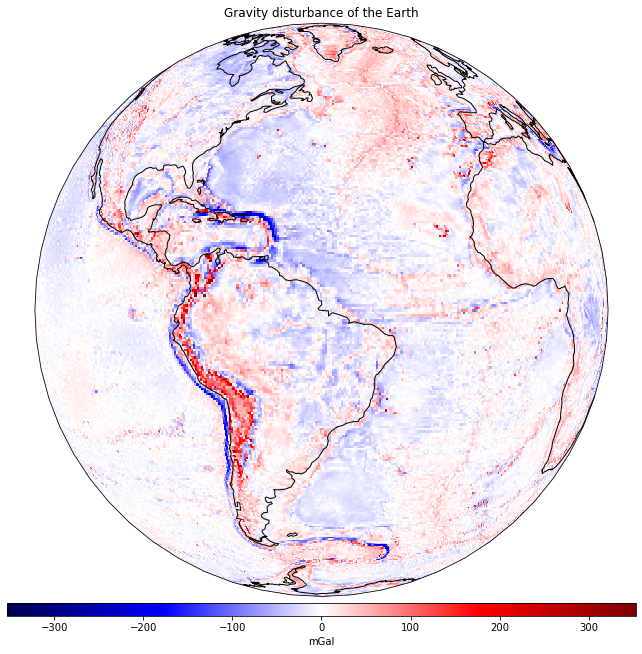

In [19]:
title_font = 20
bottom_font = 18
plt.figure(figsize=(10,10), tight_layout=True)

projection=ccrs.Orthographic(central_longitude=-50)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title("Gravity disturbance of the Earth")
pg = ax.pcolormesh(longitude,
                   latitude,
                   disturbance,transform=ccrs.PlateCarree(),cmap='seismic',vmax=ranges,vmin=-ranges)
cb = plt.colorbar(pg,label="mGal",orientation="horizontal", pad=.01, aspect=50, shrink=0.9)

file_name = 'images/gravity_disturbance'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Cálculo da anomalia bouguer

In [20]:
altura_geometrica = geoid + topography

In [21]:
bouguer = hm.bouguer_correction(altura_geometrica)

In [22]:
disturbance_topofree = disturbance - bouguer

In [23]:
ranges = np.abs(disturbance_topofree.min())

### Visualização anomalia bouguer

/home/andrelreis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


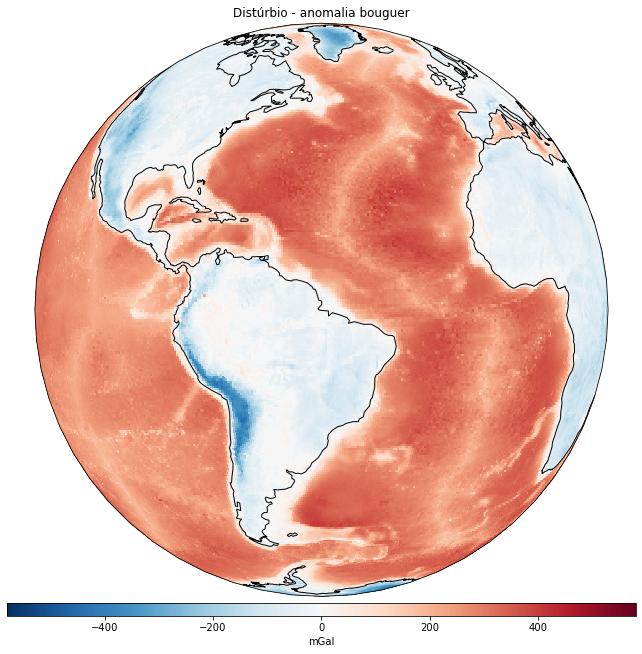

In [24]:
title_font = 20
bottom_font = 18
plt.figure(figsize=(10,10), tight_layout=True)

projection=ccrs.Orthographic(central_longitude=-50)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title("Distúrbio - anomalia bouguer")
pg = ax.pcolormesh(longitude,
                   latitude,
                   disturbance_topofree,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmax=ranges,vmin=-ranges)
cb = plt.colorbar(pg,label="mGal", orientation="horizontal", pad=.01, aspect=50, shrink=0.9)

file_name = 'images/disturbance_topofree'
plt.savefig(file_name+'.png',dpi=300)

plt.show()